# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


In [1]:
#importing tensorflow 2 
% tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Importing neccessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [0]:
#Load CIFAR10 dataset available within tensorflow
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [22]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [0]:
# train_y_0_4 = np.where(train_y <= 4) # taking all indices from training's target colum which are less then 4
# train_x_0_4 = train_x[train_y_0_4[0]] # just selecting those indeices of train_X which gets slected from target column 
# train_x_0_4.shape # checking shape just to comfirm 


In [0]:
import numpy as np
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

In [0]:
x_train_lt5 = x_train[y_train<5]
y_train_lt5 = y_train[y_train<5]
x_test_lt5 = x_test[y_test<5]
y_test_lt5 = y_test[y_test<5]

x_train_gt5 = x_train[y_train>=5]
y_train_gt5 = y_train[y_train>=5]
x_test_gt5 = x_test[y_test>=5]
y_test_gt5 = y_test[y_test>=5]

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
import pandas as pd
y_train_lt5 = pd.get_dummies(y_train_lt5)
y_test_lt5 = pd.get_dummies(y_test_lt5)

y_train_gt5 = pd.get_dummies(y_train_gt5)
y_test_gt5 = pd.get_dummies(y_test_gt5)

In [26]:
print(x_train_lt5.shape)
print(y_train_lt5.shape)
print(x_test_lt5.shape)
print(y_test_lt5.shape)

(25000, 32, 32, 3)
(25000, 5)
(5000, 32, 32, 3)
(5000, 5)


In [27]:
print(x_train_gt5.shape)
print(y_train_gt5.shape)
print(x_test_gt5.shape)
print(y_test_gt5.shape)

(25000, 32, 32, 3)
(25000, 5)
(5000, 32, 32, 3)
(5000, 5)


### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

In [0]:
# Sequential
model = Sequential()

# 1st CNN layer
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))

# 2nd CNN layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Max pool layer 
model.add(MaxPooling2D(pool_size=(2, 2)))
# Batcth normalizing
model.add(BatchNormalization())

# third CNN layer 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# 4th CNN layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# max pool  2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout = 25%

# Flattening the layer 
model.add(Flatten())

# Dens layer 
model.add(Dense(512,activation ='relu'))
# Drop out 
model.add(Dropout(0.5))

# Output layer 
model.add(Dense(5,activation='softmax'))


In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [0]:
# CallBacks 
mckpt = tf.keras.callbacks.ModelCheckpoint('./cifar.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [49]:
history=  model.fit(x_train_lt5,y_train_lt5, 
          validation_data=(x_test_lt5,y_test_lt5), 
          epochs = 30, batch_size= 32, callbacks=[mckpt],workers=4)

Train on 25000 samples, validate on 5000 samples
Epoch 1/30
25000/25000 [==============================] - 4s 153us/sample - loss: 0.1330 - accuracy: 0.9551 - val_loss: 0.6255 - val_accuracy: 0.8412
Epoch 2/30
25000/25000 [==============================] - 4s 151us/sample - loss: 0.1247 - accuracy: 0.9566 - val_loss: 0.6061 - val_accuracy: 0.8374
Epoch 3/30
25000/25000 [==============================] - 4s 153us/sample - loss: 0.1267 - accuracy: 0.9573 - val_loss: 0.6149 - val_accuracy: 0.8470
Epoch 4/30
25000/25000 [==============================] - 4s 154us/sample - loss: 0.1182 - accuracy: 0.9603 - val_loss: 0.6577 - val_accuracy: 0.8444
Epoch 5/30
25000/25000 [==============================] - 4s 153us/sample - loss: 0.1240 - accuracy: 0.9577 - val_loss: 0.6237 - val_accuracy: 0.8442
Epoch 6/30
25000/25000 [==============================] - 4s 153us/sample - loss: 0.1150 - accuracy: 0.9610 - val_loss: 0.6654 - val_accuracy: 0.8438
Epoch 7/30
25000/25000 [===========================

In [0]:
model.save_weights('weight.hdf5') # to save weights of our model 

In [0]:
model.save('model.hdf5') # to save our model 

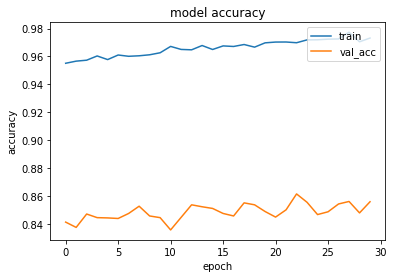

In [53]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper right')
plt.show()

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [0]:
# Loading the model 
model_5_9 =  load_model('model.hdf5')

In [58]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model_5_9.layers[:13]:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model_5_9.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv2d
False
activation
False
conv2d_1
False
activation_1
False
max_pooling2d
False
batch_normalization
False
conv2d_2
False
activation_2
False
conv2d_3
False
activation_3
False
max_pooling2d_1
False
dropout
False
flatten
False
dense
True
dropout_1
False
dense_1
True


In [59]:
model_5_9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5_9.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10 (Use Transfer Learning)

Achieve an accuracy of more than 85% on test data

In [0]:
mckpt_5_9 = tf.keras.callbacks.ModelCheckpoint('./cifar_5_9.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [61]:
history_5_9 = model_5_9.fit(x_train_gt5,y_train_gt5,
                            validation_data=(x_test_gt5,y_test_gt5),
                            epochs = 10,
                            batch_size= 32,callbacks=[mckpt_5_9],workers=4)

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 3s 135us/sample - loss: 1.9115 - accuracy: 0.5447 - val_loss: 0.6576 - val_accuracy: 0.7584
Epoch 2/10
25000/25000 [==============================] - 3s 116us/sample - loss: 0.7266 - accuracy: 0.7362 - val_loss: 0.5522 - val_accuracy: 0.7950
Epoch 3/10
25000/25000 [==============================] - 3s 114us/sample - loss: 0.5995 - accuracy: 0.7821 - val_loss: 0.5114 - val_accuracy: 0.8136
Epoch 4/10
25000/25000 [==============================] - 3s 114us/sample - loss: 0.5252 - accuracy: 0.8080 - val_loss: 0.4764 - val_accuracy: 0.8280
Epoch 5/10
25000/25000 [==============================] - 3s 115us/sample - loss: 0.4759 - accuracy: 0.8266 - val_loss: 0.4491 - val_accuracy: 0.8356
Epoch 6/10
25000/25000 [==============================] - 3s 114us/sample - loss: 0.4175 - accuracy: 0.8482 - val_loss: 0.4375 - val_accuracy: 0.8380
Epoch 7/10
25000/25000 [===========================

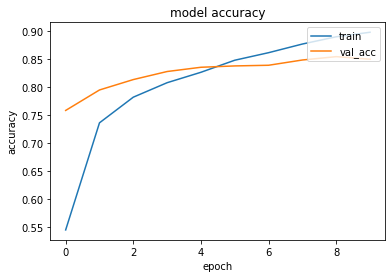

In [62]:
# summarize history for accuracy
plt.plot(history_5_9.history['accuracy'])
plt.plot(history_5_9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper right')
plt.show()

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [22]:
from sklearn.datasets import fetch_20newsgroups

In [23]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [17]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [18]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [19]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [20]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [21]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [0]:
#from sklearn.model_selection import train_test_split
# split into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
y_trn = twenty_train.target
y_tst = twenty_test.target

In [26]:
vect = TfidfVectorizer()
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm_train = vect.fit_transform(twenty_train.data)
dtm_test = vect.transform(twenty_test.data)
features = vect.get_feature_names()
print (dtm_train.shape)
print (dtm_test.shape)

(2257, 35482)
(1502, 35482)


### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [27]:
# use logistic regression with text column only
logreg = LogisticRegression()
logreg.fit(dtm_train, y_trn)
y_pred_class = logreg.predict(dtm_test)
print('test Accuracy ',metrics.accuracy_score(y_tst, y_pred_class))
y_pred_class_train = logreg.predict(dtm_train)
print('train accuracy ',metrics.accuracy_score(y_trn, y_pred_class_train))

C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


test Accuracy  0.8988015978695073
train accuracy  0.9933540097474524


In [28]:
# Classification report  
print(metrics.classification_report(y_tst, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83       319
           1       0.86      0.99      0.92       389
           2       0.94      0.89      0.91       396
           3       0.87      0.95      0.91       398

   micro avg       0.90      0.90      0.90      1502
   macro avg       0.91      0.89      0.89      1502
weighted avg       0.90      0.90      0.90      1502

